# 크롤링

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup 
from urllib.request import urlopen
from urllib.parse import quote
import time
import os

In [2]:
def get_data(data_name):  
    df_1 = pd.read_excel("semi_1_data/"+data_name,header=6) #영화 진흥 위원회(kobis) 데이터
    df_1 = df_1.drop([0])
    lst = list(df_1['영화명'])
    print(data_name)
    return lst[0:5]

In [7]:
#movie code list 함수
def code_func(name,movie_code_list):
    
    query = quote('영화'+" "+name) #영화이름만 검색해서 영화가 안 나오는 경우가 있음.
    # query = quote(" "+name)
    
    baseurl = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query='+ query
    web = urlopen(baseurl)
    source = BeautifulSoup(web,'html.parser')
  
    try:
        movie_code = source.find('div',{'class':"title_area"}).find('a').attrs['href']
    except:
        movie_code = input("{}의 코드가 검색되지 않았습니다. 직접 입력해주세요".format(name))
    # 영화 제목을 검색했을 때 네이버 영화의 코드를 얻지 못했을 경우가 종종 발생한다. 
    # 영화 제목이 하이퍼링크가 안걸린 채로 검색되는 경우가 주가 된다.
    temp = movie_code.find('=')
    movie_code_list.append(movie_code[temp+1:])
    time.sleep(0.5)
    

In [4]:
#movie info list 함수
def info_func(i,movie_info_list,year):
    url = 'https://movie.naver.com/movie/bi/mi/basic.naver?code=' + i
    web = urlopen(url)
    web_movie = BeautifulSoup(web,'html.parser')
    try:
        if str(year) in (web_movie.find('p',{'class':'info_spec'}).find_all('span')[3].get_text()):
            print(url)
            title = web_movie.find('div',{'class':'mv_info'}).find('a').get_text() #제목

            genres = ''
            for genre in web_movie.find('p', {'class':'info_spec'}).find_all('a'): #장르
                        if genre.attrs["href"].startswith("/movie/sdb/browsing/bmovie.naver?genre="):
                            genre = genre.get_text()
                            genres = genres+','+genre

            nation = web_movie.find('p', {'class':'info_spec'}).find_all('span')[1].get_text() #국가
            nation = nation.replace('\n','').replace('\r','').replace('\t','')

            con_tx = web_movie.find('p', {'class':'con_tx'}).get_text() #줄거리
            con_tx = con_tx.replace('\xa0','').replace('\r','')

            if idx == "1":
                idx_temp = "설날"
            else:
                idx_temp = "추석"

            movie_info_list.append([title,con_tx,genres,nation,year,idx_temp])
            time.sleep(0.5)
        else:
            print("일치하지 않습니다 확인해 주세요. url :",'https://movie.naver.com/movie/bi/mi/basic.naver?code=' + i)
            # 같은 제목의 영화가 많을 경우 잘 못 크롤링 될 수 있다.
            # 년도도 같으면 검출 불가.
            title = ''
            genres = ''
            nation = ''
            con_tx = ''
            year = ''
            idx_temp = '다른 영화가 크롤링 된 영화'
            movie_info_list.append([title,con_tx,genres,nation,year,idx_temp])
    except:
        print(url,"에러가 발생하였습니다 확인해 주세요")
        # 네이버 영화 페이지에서 정보를 얻지 못했을 때가 있음.

        title = ''
        genres = ''
        nation = ''
        con_tx = ''
        year = ''
        idx_temp = '에러가 발생된 영화'
        movie_info_list.append([title,con_tx,genres,nation,year,idx_temp])

In [5]:
def main_func(lst,year,idx): #메인 함수
    
    movie_name_list = []
    for name in lst:   
        
        movie_name_list.append(name)
    
    movie_code_list = [] 
    for name in movie_name_list:
        code_func(name,movie_code_list) #대상 영화의 코드를 얻는 과정
       
    movie_info_list = []
    for code in movie_code_list:
        info_func(code,movie_info_list,year) #코드를 얻은 영화의 정보 얻기
        
    index_1 = ['title','plot','genre','nation','date','index'] 
    pd_1 = pd.DataFrame(movie_info_list,columns = index_1)
    return pd_1

In [8]:
#메인 코드 실행 셀

pd_al = pd.DataFrame()
datalist = []
for i in range(10):
    str_1 = str(i+2009)
    for j in range(2):
        str_2 = str_1+'_'+str(j+1)
        str_3 = str_2+".xlsx"
        datalist.append(str_3)

for data in datalist:
    
    lst = get_data(data)
    year = data[:4]
    idx = data[5]
    
    pd_temp = main_func(lst,year,idx) #
    
    pd_al = pd.concat([pd_al,pd_temp])

2009_1.xlsx
https://movie.naver.com/movie/bi/mi/basic.naver?code=50184
https://movie.naver.com/movie/bi/mi/basic.naver?code=68063
https://movie.naver.com/movie/bi/mi/basic.naver?code=51306
일치하지 않습니다 확인해 주세요. url : https://movie.naver.com/movie/bi/mi/basic.naver?code=51143
https://movie.naver.com/movie/bi/mi/basic.naver?code=68952
2009_2.xlsx
https://movie.naver.com/movie/bi/mi/basic.naver?code=51076
https://movie.naver.com/movie/bi/mi/basic.naver?code=57865
https://movie.naver.com/movie/bi/mi/basic.naver?code=70469
https://movie.naver.com/movie/bi/mi/basic.naver?code=51407
https://movie.naver.com/movie/bi/mi/basic.naver?code=53351
2010_1.xlsx
https://movie.naver.com/movie/bi/mi/basic.naver?code=52548
https://movie.naver.com/movie/bi/mi/basic.naver?code=69958
https://movie.naver.com/movie/bi/mi/basic.naver?code=53034
https://movie.naver.com/movie/bi/mi/basic.naver?code=53097
일치하지 않습니다 확인해 주세요. url : https://movie.naver.com/movie/bi/mi/basic.naver?code=100950
2010_2.xlsx
https://movie.na

In [9]:
pd_al

,title,plot,genre,nation,date,index
0,적벽대전 2부 - 최후의 결전,"유비의 책사 제갈량은 손권과의 동맹에 극적으로 성공하고, 손권 휘하의 명장 주유와 ...",",전쟁,액션",중국,2009,설날
1,작전명 발키리,강직한 성품의 클라우스 폰 슈타펜버그 대령은 조국과 국민을 위하는 충성스런 장교이지...,",스릴러,드라마,전쟁","미국, 독일",2009,설날
2,유감스러운 도시,강력계 근성이 숨쉬고 있는 교통 경찰 ‘장충동’. 외부에 얼굴이 알려지지 않았다는 ...,",액션,범죄,코미디",한국,2009,설날
3,,,,,,다른 영화가 크롤링 된 영화
4,잉크하트,소리 내어 읽으면 책 속의 인물을 현실 세계로 불러낼 수 있는 신비한 능력을 가진 ...,",판타지,모험","미국, 독일, 영국",2009,설날
...,...,...,...,...,...,...
0,안시성,우리는 물러서는 법을 배우지 못했다! 우리는 무릎 꿇는 법을 배우지 못했다! 우리는...,",액션",한국,2018,추석
1,,,,,,다른 영화가 크롤링 된 영화
2,협상,어떠한 상황에서도 냉철함을 잃지 않던 최고의 협상가 ‘하채윤’은긴급 투입된 현장에서...,",범죄",한국,2018,추석
3,,,,,,다른 영화가 크롤링 된 영화


In [10]:
pd_al.to_excel('semi_1_data/movie_info.xlsx')

# 데이터 시각화

In [14]:
pip install konlpy

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install WordCloud

     -------------------------------------- 155.9/155.9 kB 9.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [23]:
from konlpy.tag import Okt
from pprint import pprint
from collections import Counter

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
from wordcloud import WordCloud
from PIL import Image # 만약 "No module named 'PIL'" 에러가 발생하면 [ pip install Pillow==5.4.1 ] 로 라이브러리를 설치해줍니다.
import numpy as np
%matplotlib inline

In [19]:
df = pd.read_excel('semi_1_data/movie.xlsx')

In [20]:
# 불용어 리스트 저장
del_list = ['아','휴','아이구','아이쿠','아이고','어','나','우리','저희','따라','의해','을','를','에','의','가','으로','로','게','뿐이다','의거하여','근거하여','입각하여','기준으로','예하면','예를','들면','예를','들자면','저','소인','소생','저희','지말고','하지마','하지마라','다른','물론','또한','그리고','비길수','없다','해서는','안된다','뿐만','아니라','만이','아니다','만은','아니다','막론하고','관계없이','그치지','않다','그러나','그런데','하지만','든간에','논하지','않다','따지지','않다','설사','비록','더라도','아니면','만','못하다','하는','편이','낫다','불문하고','향하여','향해서','향하다','쪽으로','틈타','이용하여','타다','오르다','제외하고','이','외에','이','밖에','하여야','비로소','한다면','몰라도','외에도','이곳','여기','부터','기점으로','따라서','할','생각이다','하려고하다','이리하여','그리하여','그렇게','함으로써','하지만','일때','할때','앞에서','중에서','보는데서','으로써','로써','까지','해야한다','일것이다','반드시','할줄알다','할수있다','할수있어','임에','틀림없다','한다면','등','등등','제','겨우','단지','다만','할뿐','딩동','댕그','대해서','대하여','대하면','훨씬','얼마나','얼마만큼','얼마큼','남짓','여','얼마간','약간','다소','좀','조금','다수','몇','얼마','지만','하물며','또한','그러나','그렇지만','하지만','이외에도','대해','말하자면','뿐이다','다음에','반대로','반대로','말하자면','이와','반대로','바꾸어서','말하면','바꾸어서','한다면','만약','그렇지않으면','까악','툭','딱','삐걱거리다','보드득','비걱거리다','꽈당','응당','해야한다','에','가서','각','각각','여러분','각종','각자','제각기','하도록하다','와','과','그러므로','그래서','고로','한','까닭에','하기','때문에','거니와','이지만','대하여','관하여','관한','과연','실로','아니나다를가','생각한대로','진짜로','한적이있다','하곤하였다','하','하하','허허','아하','거바','와','오','왜','어째서','무엇때문에','어찌','하겠는가','무슨','어디','어느곳','더군다나','하물며','더욱이는','어느때','언제','야','이봐','어이','여보시오','흐흐','흥','휴','헉헉','헐떡헐떡','영차','여차','어기여차','끙끙','아야','앗','아야','콸콸','졸졸','좍좍','뚝뚝','주룩주룩','솨','우르르','그래도','또','그리고','바꾸어말하면','바꾸어말하자면','혹은','혹시','답다','및','그에','따르는','때가','되어','즉','지든지','설령','가령','하더라도','할지라도','일지라도','지든지','몇','거의','하마터면','인젠','이젠','된바에야','된이상','만큼','어찌됏든','그위에','게다가','점에서','보아','비추어','보아','고려하면','하게될것이다','일것이다','비교적','좀','보다더','비하면','시키다','하게하다','할만하다','의해서','연이서','이어서','잇따라','뒤따라','뒤이어','결국','의지하여','기대여','통하여','자마자','더욱더','불구하고','얼마든지','마음대로','주저하지','않고','곧','즉시','바로','당장','하자마자','밖에','안된다','하면된다','그래','그렇지','요컨대','다시','말하자면','바꿔','말하면','즉','구체적으로','말하자면','시작하여','시초에','이상','허','헉','허걱','바와같이','해도좋다','해도된다','게다가','더구나','하물며','와르르','팍','퍽','펄렁','동안','이래','하고있었다','이었다','에서','로부터','까지','예하면','했어요','해요','함께','같이','더불어','마저','마저도','양자','모두','습니다','가까스로','하려고하다','즈음하여','다른','다른','방면으로','해봐요','습니까','했어요','말할것도','없고','무릎쓰고','개의치않고','하는것만','못하다','하는것이','낫다','매','매번','들','모','어느것','어느','로써','갖고말하자면','어디','어느쪽','어느것','어느해','어느','년도','라','해도','언젠가','어떤것','어느것','저기','저쪽','저것','그때','그럼','그러면','요만한걸','그래','그때','저것만큼','그저','이르기까지','할','줄','안다','할','힘이','있다','너','너희','당신','어찌','설마','차라리','할지언정','할지라도','할망정','할지언정','구토하다','게우다','토하다','메쓰겁다','옆사람','퉤','쳇','의거하여','근거하여','의해','따라','힘입어','그','다음','버금','두번째로','기타','첫번째로','나머지는','그중에서','견지에서','형식으로','쓰여','입장에서','위해서','단지','의해되다','하도록시키다','뿐만아니라','반대로','전후','전자','앞의것','잠시','잠깐','하면서','그렇지만','다음에','그러한즉','그런즉','남들','아무거나','어찌하든지','같다','비슷하다','예컨대','이럴정도로','어떻게','만약','만일','위에서','서술한바와같이','인','듯하다','하지','않는다면','만약에','무엇','무슨','어느','어떤','아래윗','조차','한데','그럼에도','불구하고','여전히','심지어','까지도','조차도','하지','않도록','않기','위하여','때','시각','무렵','시간','동안','어때','어떠한','하여금','네','예','우선','누구','누가','알겠는가','아무도','줄은모른다','줄은','몰랏다','하는','김에','겸사겸사','하는바','그런','까닭에','한','이유는','그러니','그러니까','때문에','그','너희','그들','너희들','타인','것','것들','너','위하여','공동으로','동시에','하기','위하여','어찌하여','무엇때문에','붕붕','윙윙','나','우리','엉엉','휘익','윙윙','오호','아하','어쨋든','만','못하다','하기보다는','차라리','하는','편이','낫다','흐흐','놀라다','상대적으로','말하자면','마치','아니라면','쉿','그렇지','않으면','그렇지','않다면','안','그러면','아니었다면','하든지','아니면','이라면','좋아','알았어','하는것도','그만이다','어쩔수','없다','하나','일','일반적으로','일단','한켠으로는','오자마자','이렇게되면','이와같다면','전부','한마디','한항목','근거로','하기에','아울러','하지','않도록','않기','위해서','이르기까지','이','되다','로','인하여','까닭으로','이유만으로','이로','인하여','그래서','이','때문에','그러므로','그런','까닭에','알','수','있다','결론을','낼','수','있다','으로','인하여','있다','어떤것','관계가','있다','관련이','있다','연관되다','어떤것들','에','대해','이리하여','그리하여','여부','하기보다는','하느니','하면','할수록','운운','이러이러하다','하구나','하도다','다시말하면','다음으로','에','있다','에','달려','있다','우리','우리들','오히려','하기는한데','어떻게','어떻해','어찌됏어','어때','어째서','본대로','자','이','이쪽','여기','이것','이번','이렇게말하자면','이런','이러한','이와','같은','요만큼','요만한','것','얼마','안','되는','것','이만큼','이','정도의','이렇게','많은','것','이와','같다','이때','이렇구나','것과','같이','끼익','삐걱','따위','와','같은','사람들','부류의','사람들','왜냐하면','중의하나','오직','오로지','에','한하다','하기만','하면','도착하다','까지','미치다','도달하다','정도에','이르다','할','지경이다','결과에','이르다','관해서는','여러분','하고','있다','한','후','혼자','자기','자기집','자신','우에','종합한것과같이','총적으로','보면','총적으로','말하면','총적으로','대로','하다','으로서','참','그만이다','할','따름이다','쿵','탕탕','쾅쾅','둥둥','봐','봐라','아이야','아니','와아','응','아이','참나','년','월','일','령','영','일','이','삼','사','오','육','륙','칠','팔','구','이천육','이천칠','이천팔','이천구','하나','둘','셋','넷','다섯','여섯','일곱','여덟','아홉','령','영','하다','있다','되다','이다','돼다','않다','그렇다','아니다','이렇다','그렇다','어떻다','를','을','그','이','저','과','와','것','들','은','수','이다','도','에','의','까지','든','으로','로','아','휴','위해','카프리','읽다','받다','크게','불다','잉크','직접','알려지다','맡다','찾다','빠지다','완벽하다','이제','지금','클라우스','크다','입다','시르다','서다','모든','10','남현수','차태현','DJ','그것','나타나다','집다','나오다','다니다','제대로','걸리다','내다','9년','리사','그녀','자영','써로게이트','받다','점점','그리다','되어다','늘다','100%','영희','승필','없이','때마침','하지원','지수','이다','점점','우도','마침내','그토록','피하','싶다','19','세기','로움','말리','위해','100%','브루스','윌리스','최영희','대미','톨스토이','사보다','써다','500억','이범수','9시','손창민','일주일','미선이','매니저','지금','석현','지원','신들','퍼시','윤경','장수영','한상준','로서','잭슨','개월','플린트','점점','점차','최연','처음','만난','그날','데미갓','퍼시잭슨','지혜','베스','로버','수호','정혜','김윤진','나문희','리기','브렌','스티브','지진희','하정우','누군가','이제','시작','서로','때로는','병훈','상용','리즈','태민','엄브렐러','코퍼레이션','앨리스','시라노','대신','엄태웅','박신혜','민영','최다니엘','민정','진짜','그녀','살의','서른','정말','보이','보기','무작정','간의','주진모','김강우','로서','마주','송승헌','조한선','강태식','몰리','크리스','웨스커','라푼젤','맥시머스','스태빙턴','점점','고델','알라','프랭크','꿀꺽','위해','전체','멀티','기상','외한','동상','이몽','꿍꿍','서서','노망','미션임파서블','에코','최첨단','카리스마','오매불망','님자','갑순이','역사상','김상','배트','회부','하라','충주','더욱이','부와','플레이도','부의','가까이','발짝','등장','상남','글쎄','아무','대형','달리','난생처음','준비','카리스마','파의','김수미','백호','인자','인재','신현준','탁재훈','석재','임형준','자인','가장','제대로','주신','도르곤','귀요미','파퍼','남만','상한','애물','백방','마리','뒤뚱뒤뚱','좌충우돌','뉴욕','강풀','곽경택','권상우','동현','한번','치명','김수정','승호','차태현','마돈나','서울','모르다','부인과','위험천만','김경호','담당','아치','박준','등장','띠기','이야기','베른','스티븐슨','스위프트','신비','아틀란티스','슈렉','지금','순간','키티','덤티','점박이','애꾸눈','오른','국정','대한','점점','메기','파리','그레이스','브라이언','리암','니슨','위해','레노어팜케','이스탄불','얀슨는','레노아','스코틀랜드','메리다','엘리','노어','리더','김수로','이제훈','곽도원','승희','김윤혜','초딩','조이','양경모','전문','영강','예원','마주','숨기','로케이션','비아그라','이중','최부','난생처음','준비','카리스마','파의','김수미','백호','인자','인재','신현준','탁재훈','석재','임형준','자인','가장','제대로','주신','도르곤','귀요미','파퍼','남만','상한','애물','백방','마리','뒤뚱뒤뚱','좌충우돌','뉴욕','강풀','곽경택','권상우','동현','한번','치명','김수정','승호','차태현','마돈나','서울','모르다','부인과','위험천만','김경호','담당','아치','박준','등장','띠기','이야기','베른','스티븐슨','스위프트','신비','아틀란티스','슈렉','지금','순간','키티','덤티','점박이','애꾸눈','오른','국정','대한','점점','메기','파리','그레이스','브라이언','리암','니슨','위해','레노어팜케','이스탄불','얀슨는','레노아','스코틀랜드','메리다','엘리','노어','리더','김수로','이제훈','곽도원','승희','김윤혜','초딩','조이','양경모','전문','영강','예원','마주','숨기','로케이션','비아그라','이중','최부','영희','명수','위해','모든','철수','종성','대한민국','아름이','맥클레인','모든','루시','엘사','중길','소희','송변','번방','용구','베를린','정진','정희','김윤석','뽀로로','로부터','모두','서로','홍의','아무','태국','전지','간다','과연','페론','지금','마이크','설리','안고','그루','안나','미니','충청도','홍성','서울','부산','진우','고니','대길','대수','다그','최해','위해','쎄다','김민','에그','킹스','이장희','제일','두다','한번','최고','싶다','평생','앨런','사로자다','19년','지난','매일','달라','꿈틀','최초','동시','나선','더욱','높다','2년','가다','없이','베테','콜린','퍼스','태런','애거','사실','1950년','린다','이후','황정민','많다','컴버','배다','24시간','마다','때문','말다','조영남','제대로','얼떨결','모든','민자영','그녀','위해','쎄다','김민','에그','킹스','이장희','제일','두다','한번','최고','싶다','평생','앨런','사로자다','19년','지난','매일','달라','꿈틀','최초','동시','나선','더욱','높다','2년','가다','없이','베테','콜린','퍼스','태런','애거','사실','1950년','린다','이후','황정민','많다','컴버','배다','24시간','마다','때문','말다','조영남','제대로','얼떨결','모든','민자영','그녀','위해','달리','내내','점점','최대','권상우','성동일','눈엣','가시','이자','없이','이제','오다','해서웨이','줄스앤','직접','한편','수십','비롯','로버트','일어나고','황정민','오달수','장윤주','김시후','쫓다','찰나','태오','유해진','유유','9월','1년','220','TPO','맞다','끊다','챙기다','30','CEO','풍부하다','70','20년','사오','사대','오랫','VS','2015년','재욱','앨빈','쓰다','황정민','없이','강동원','우연히','진짜','만난','보내다','맞닥뜨리','테오','때마침','석스','점점','칩멍크','루나','위해','비롯','가장','윌슨','이드','라이언','레놀즈은','지니다','유명하다','15년','5년','위해','송강호','이정','김우진','가운데','주요','되어다','한순간','에스더','치좀덴젤','워싱턴','조슈아','크리스','프랫','이병헌','락스','마지막','누빈','하나로','런던','압솔렘','하얗다','통해','한편','아웃랜드','붉다','노리','1920년','5년','진정하다','맞서다','1879년','없이','어느새다','넣다','엄브렐라','동판','민재','중인','장첸','타키','츠맨','윤계상','스테이','진태','골든','철령','의하다','마우이','현빈','김주혁','유해진','태수','투누','앨리','스밀라','시발','앨리스','도쿄','미츠','미츠하','1636년','14년','조정은','최명길','이병헌','한다는','김상헌','김윤석','박해일','곳도','2004년','조재윤','석도','마동석','태런','멀린','마크','스트롱','켄터키','줄리','무어','휘저으','무려','8천','매라','20','누구','결코','간다','설리','리버티','과연','위해','시빌','와칸','티찰라','채드윅','비브라늄','블랙','팬서','김민','데모','건우','강동원','무열','로부터','민씨','김의성','동규','김대','금철','김성균','선영','한효주','조혁','조항리','코난','미란','보라','VS','5천','20만','40','양만춘','박재상','조승우','장동','김씨','13년','김좌근','채윤','10일','그로','민태구','위해','12시간','버크','김영광','고스트','태진','시작','사건','2011년','1월','유일하다','남다','듣다','어리다','지내다','잘나다','버리다','정승']


In [21]:
lst = list(df['plot'])
con_tx = []
cleaned_word_list_result = []
for i in range(10):
    str_1 = str(i+2009)
    for j in range(2):
        str_2 = str_1+'_'+str(j+1)

        txt = lst[((i*2)+j)*5:((i*2)+j)*5+5]

        con_tx.append(0)
        for k in range(5):
            con_tx[((i*2)+j)] = str(con_tx[((i*2)+j)])+str(txt[k])

        tokenizer = Okt()
        raw_pos_tagged = tokenizer.pos(con_tx[(i*2)+j], norm=True, stem=True)

        word_cleaned = []
        for word in raw_pos_tagged:
            if not word[1] in ["Josa", "Eomi", "Punctuation", "Foreign"]:
                if (len(word[0]) != 1) & (word[0] not in del_list):
                    word_cleaned.append(word[0])
        cleaned_word_list_result.append(word_cleaned)

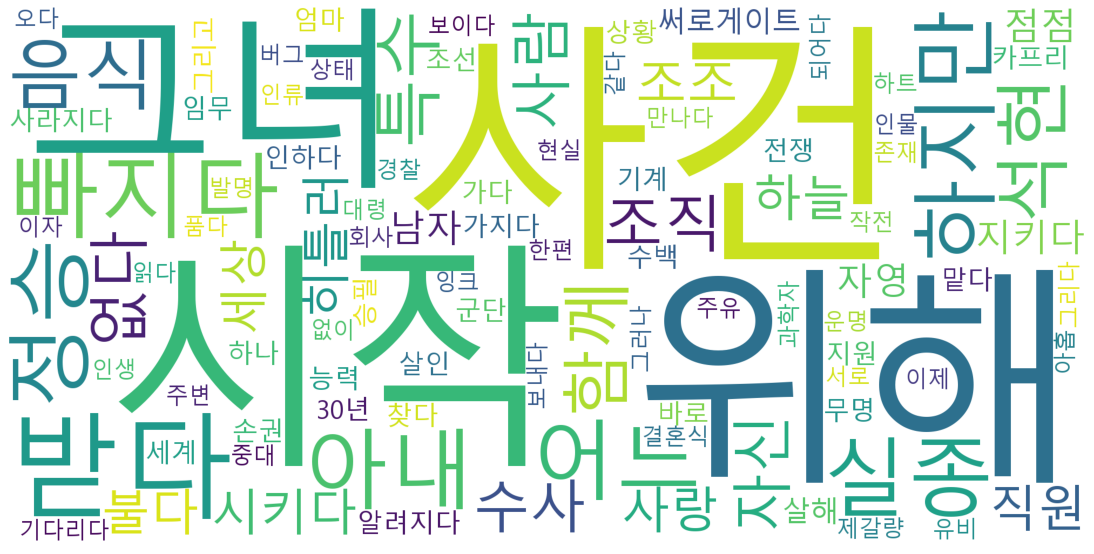

In [24]:
lst = []
for i in range(0, 3):
    lst = lst+cleaned_word_list_result[i]

word_dic = {}

for word in lst:
    if word not in word_dic:
        word_dic[word] = 1  # changed from "0" to "1"
    else:
        word_dic[word] += 1

sorted_word_dic = sorted(word_dic.items(), key=lambda x: x[1], reverse=True)
word_cloud = WordCloud(font_path="C:/Windows/Fonts/malgun.ttf",  # font_path="C:/Windows/Fonts/NanumSquareB.ttf"
                       # 이 부분을 수정하시면 실제 워드클라우드의 크기가 바뀝니다 (해상도가 바뀝니다)
                       max_words=100, width=2000, height=1000,
                       # prefer_horizontal= 1.0, # 이 부분의 주석을 해제하시면 단어들이 가로로만 그려지게 됩니다. (0~1)
                       background_color='white')
word_cloud.generate_from_frequencies(word_dic)
plt.figure(figsize=(15, 15))  # 이 부분을 수정하시면 화면에서 보여지는 워드클라우드의 크기가 바뀝니다
plt.imshow(word_cloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()